In [1]:

#import imp library 
import pandas as pd
import re
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import statsmodels as sm
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import scikitplot as skplt
import warnings
import math
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\Used car.csv")
data

,Unnamed: 0,Brand,Price,History,Owner,Kilometers,Fuel_Type,Last_service,Transmission,Registration,Insurance,Year of Manufacturing
0,0,2020 Maruti Swift LXI MANUAL,"₹ 5,66,399",Non-Accidental,1st Owner,"1,755 km",Petrol,Petrol,DL-3C-x-xxxx,Valid upto Mar 2022\nZero_Dep,February 2020,-
1,1,2015 Maruti Alto K10 LXI MANUAL,"₹ 2,67,799",Non-Accidental,1st Owner,"10,957 km",Petrol,Petrol,MANUAL,HR-51-x-xxxx,Valid upto Sep 2022\n3rd Party,-
2,2,2020 Maruti Swift LXI MANUAL,"₹ 5,59,499",Non-Accidental,1st Owner,"3,570 km",Petrol,Petrol,MANUAL,DL-2C-x-xxxx,Valid upto Feb 2022\nZero_Dep,-
3,3,2020 Maruti S PRESSO VXI,"₹ 3,98,999",Non-Accidental,1st Owner,"3,176 km",Petrol,Petrol,NaN,HR-51-x-xxxx,Valid upto Jan 2022\nZero_Dep,-
4,4,2020 Renault TRIBER RXZ AT AUTOMATIC,"₹ 6,41,499",Non-Accidental,1st Owner,"6,460 km",Petrol,Petrol,AUTOMATIC,PB-10-x-xxxx,Valid upto Sep 2022\n3rd Party,-
...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,2019 Maruti Ciaz DELTA 1.5 SHVS VVT MT MANUAL,"₹ 7,95,699",Non-Accidental,2nd Owner,"7,620 km",Petrol,Petrol,MANUAL,HR-26-x-xxxx,Valid upto Sep 2022\n3rd Party,-
696,696,2017 Maruti Swift Dzire LDI BS IV MANUAL,"₹ 4,52,599",Non-Accidental,2nd Owner,"50,943 km",Diesel,Diesel,MANUAL,DL-1C-x-xxxx,Valid upto Sep 2022\n3rd Party,-
697,697,2017 Hyundai Elite i20 SPORTZ 1.2 MANUAL,"₹ 5,50,000",Non-Accidental,1st Owner,"34,724 km",Petrol,Petrol,DL-8C-x-xxxx,Valid upto Sep 2022\n3rd Party,March 2017,-
698,698,2012 Chevrolet Aveo U VA LS 1.2 MANUAL,"₹ 1,65,000",Non-Accidental,1st Owner,"71,131 km",Petrol,Petrol,DL-9C-x-xxxx,Valid upto Sep 2022\n3rd Party,January 2012,-


In [3]:
data.drop(columns='Unnamed: 0',inplace=True)

In [4]:
data.describe()

,Brand,Price,History,Owner,Kilometers,Fuel_Type,Last_service,Transmission,Registration,Insurance,Year of Manufacturing
count,700,700,700,700,700,700,700,689,700,700,700
unique,425,645,1,4,697,3,3,38,70,139,1
top,2018 Maruti Alto 800 LXI MANUAL,"₹ 5,25,000",Non-Accidental,1st Owner,"55,255 km",Petrol,Petrol,MANUAL,Valid upto Sep 2022\n3rd Party,Valid upto Sep 2022\n3rd Party,-
freq,15,4,700,572,2,534,534,373,225,296,700


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Brand                  700 non-null    object
 1   Price                  700 non-null    object
 2   History                700 non-null    object
 3   Owner                  700 non-null    object
 4   Kilometers             700 non-null    object
 5   Fuel_Type              700 non-null    object
 6   Last_service           700 non-null    object
 7   Transmission           689 non-null    object
 8   Registration           700 non-null    object
 9   Insurance              700 non-null    object
 10  Year of Manufacturing  700 non-null    object
dtypes: object(11)
memory usage: 60.3+ KB


all data are object but price and kilometers can convert into numeric values ,lets do it now

In [6]:
data1=data.iloc[::,1:2]
data1

,Price
0,"₹ 5,66,399"
1,"₹ 2,67,799"
2,"₹ 5,59,499"
3,"₹ 3,98,999"
4,"₹ 6,41,499"
...,...
695,"₹ 7,95,699"
696,"₹ 4,52,599"
697,"₹ 5,50,000"
698,"₹ 1,65,000"


In [7]:
data.Price

0      ₹ 5,66,399
1      ₹ 2,67,799
2      ₹ 5,59,499
3      ₹ 3,98,999
4      ₹ 6,41,499
          ...    
695    ₹ 7,95,699
696    ₹ 4,52,599
697    ₹ 5,50,000
698    ₹ 1,65,000
699    ₹ 4,65,399
Name: Price, Length: 700, dtype: object

In [8]:
data["Price"]=data.Price.str.strip('₹ ,')

In [9]:
data['Price'] = data['Price'].str.replace(',', '')

In [10]:
data['Price']=data['Price'].str.strip()

In [11]:
data.Kilometers

0       1,755 km
1      10,957 km
2       3,570 km
3       3,176 km
4       6,460 km
         ...    
695     7,620 km
696    50,943 km
697    34,724 km
698    71,131 km
699    51,789 km
Name: Kilometers, Length: 700, dtype: object

In [12]:
data["Kilometers"]=data.Kilometers.str.strip(' km')

In [13]:
data['Kilometers'] = data['Kilometers'].str.replace(',', '')


In [14]:
data['Kilometers']=data['Kilometers'].str.strip()

In [15]:
data['Price']=pd.to_numeric(data.Price)

In [16]:
data['Kilometers']=pd.to_numeric(data.Kilometers)

In [17]:
data.tail()

,Brand,Price,History,Owner,Kilometers,Fuel_Type,Last_service,Transmission,Registration,Insurance,Year of Manufacturing
695,2019 Maruti Ciaz DELTA 1.5 SHVS VVT MT MANUAL,795699,Non-Accidental,2nd Owner,7620,Petrol,Petrol,MANUAL,HR-26-x-xxxx,Valid upto Sep 2022\n3rd Party,-
696,2017 Maruti Swift Dzire LDI BS IV MANUAL,452599,Non-Accidental,2nd Owner,50943,Diesel,Diesel,MANUAL,DL-1C-x-xxxx,Valid upto Sep 2022\n3rd Party,-
697,2017 Hyundai Elite i20 SPORTZ 1.2 MANUAL,550000,Non-Accidental,1st Owner,34724,Petrol,Petrol,DL-8C-x-xxxx,Valid upto Sep 2022\n3rd Party,March 2017,-
698,2012 Chevrolet Aveo U VA LS 1.2 MANUAL,165000,Non-Accidental,1st Owner,71131,Petrol,Petrol,DL-9C-x-xxxx,Valid upto Sep 2022\n3rd Party,January 2012,-
699,2018 Maruti Swift VXI MANUAL,465399,Non-Accidental,1st Owner,51789,Petrol,Petrol,MANUAL,DL-2C-x-xxxx,Valid upto Mar 2022\nThird Party,-


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Brand                  700 non-null    object
 1   Price                  700 non-null    int64 
 2   History                700 non-null    object
 3   Owner                  700 non-null    object
 4   Kilometers             700 non-null    int64 
 5   Fuel_Type              700 non-null    object
 6   Last_service           700 non-null    object
 7   Transmission           689 non-null    object
 8   Registration           700 non-null    object
 9   Insurance              700 non-null    object
 10  Year of Manufacturing  700 non-null    object
dtypes: int64(2), object(9)
memory usage: 60.3+ KB


Year of manufacturing is no year mention in csv file so i have to drop this column

In [19]:
data.isna().sum()

Brand                     0
Price                     0
History                   0
Owner                     0
Kilometers                0
Fuel_Type                 0
Last_service              0
Transmission             11
Registration              0
Insurance                 0
Year of Manufacturing     0
dtype: int64

In [20]:
data["Transmission"]=data["Transmission"].fillna(data["Transmission"].mode()[0])

In [21]:
data.isna().sum()

Brand                    0
Price                    0
History                  0
Owner                    0
Kilometers               0
Fuel_Type                0
Last_service             0
Transmission             0
Registration             0
Insurance                0
Year of Manufacturing    0
dtype: int64

now no nan values

In [22]:
data.drop(columns='Year of Manufacturing',inplace=True)

In [23]:
data

,Brand,Price,History,Owner,Kilometers,Fuel_Type,Last_service,Transmission,Registration,Insurance
0,2020 Maruti Swift LXI MANUAL,566399,Non-Accidental,1st Owner,1755,Petrol,Petrol,DL-3C-x-xxxx,Valid upto Mar 2022\nZero_Dep,February 2020
1,2015 Maruti Alto K10 LXI MANUAL,267799,Non-Accidental,1st Owner,10957,Petrol,Petrol,MANUAL,HR-51-x-xxxx,Valid upto Sep 2022\n3rd Party
2,2020 Maruti Swift LXI MANUAL,559499,Non-Accidental,1st Owner,3570,Petrol,Petrol,MANUAL,DL-2C-x-xxxx,Valid upto Feb 2022\nZero_Dep
3,2020 Maruti S PRESSO VXI,398999,Non-Accidental,1st Owner,3176,Petrol,Petrol,MANUAL,HR-51-x-xxxx,Valid upto Jan 2022\nZero_Dep
4,2020 Renault TRIBER RXZ AT AUTOMATIC,641499,Non-Accidental,1st Owner,6460,Petrol,Petrol,AUTOMATIC,PB-10-x-xxxx,Valid upto Sep 2022\n3rd Party
...,...,...,...,...,...,...,...,...,...,...
695,2019 Maruti Ciaz DELTA 1.5 SHVS VVT MT MANUAL,795699,Non-Accidental,2nd Owner,7620,Petrol,Petrol,MANUAL,HR-26-x-xxxx,Valid upto Sep 2022\n3rd Party
696,2017 Maruti Swift Dzire LDI BS IV MANUAL,452599,Non-Accidental,2nd Owner,50943,Diesel,Diesel,MANUAL,DL-1C-x-xxxx,Valid upto Sep 2022\n3rd Party
697,2017 Hyundai Elite i20 SPORTZ 1.2 MANUAL,550000,Non-Accidental,1st Owner,34724,Petrol,Petrol,DL-8C-x-xxxx,Valid upto Sep 2022\n3rd Party,March 2017
698,2012 Chevrolet Aveo U VA LS 1.2 MANUAL,165000,Non-Accidental,1st Owner,71131,Petrol,Petrol,DL-9C-x-xxxx,Valid upto Sep 2022\n3rd Party,January 2012


In [24]:
object_data=data[['Brand','History','Owner','Fuel_Type','Last_service','Transmission','Registration','Insurance']]

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         700 non-null    object
 1   Price         700 non-null    int64 
 2   History       700 non-null    object
 3   Owner         700 non-null    object
 4   Kilometers    700 non-null    int64 
 5   Fuel_Type     700 non-null    object
 6   Last_service  700 non-null    object
 7   Transmission  700 non-null    object
 8   Registration  700 non-null    object
 9   Insurance     700 non-null    object
dtypes: int64(2), object(8)
memory usage: 54.8+ KB


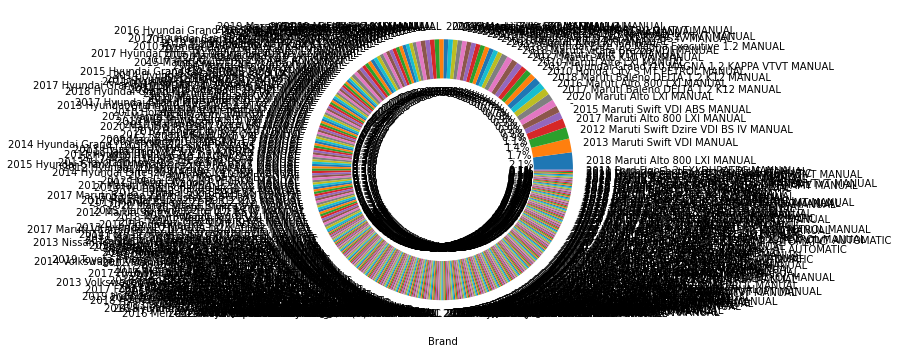

<Figure size 432x288 with 0 Axes>

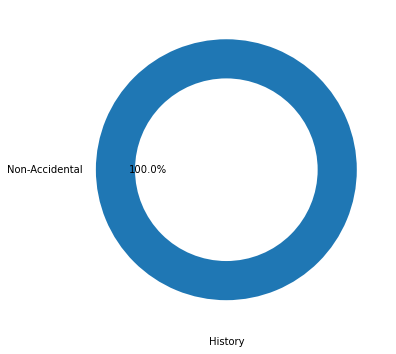

<Figure size 432x288 with 0 Axes>

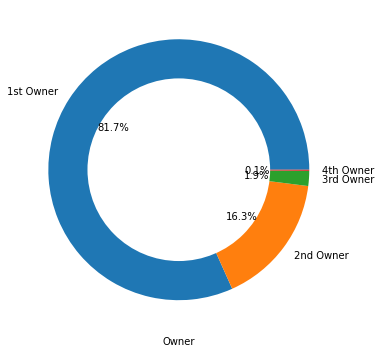

<Figure size 432x288 with 0 Axes>

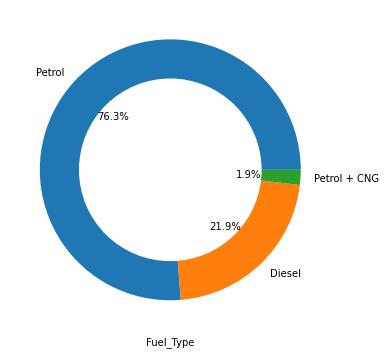

<Figure size 432x288 with 0 Axes>

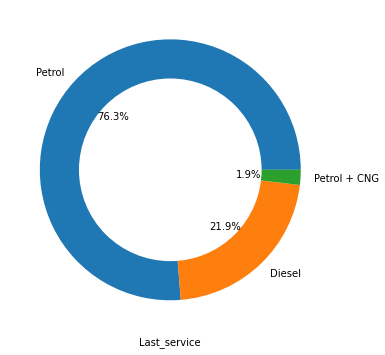

<Figure size 432x288 with 0 Axes>

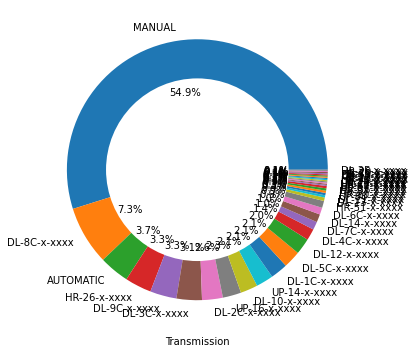

<Figure size 432x288 with 0 Axes>

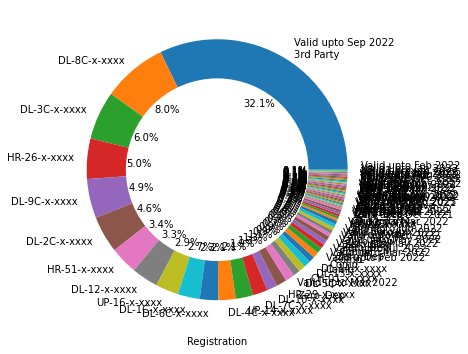

<Figure size 432x288 with 0 Axes>

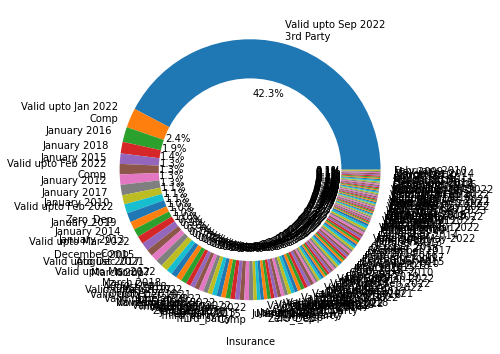

<Figure size 432x288 with 0 Axes>

In [26]:
#piechart analysis for object data
for i in object_data:
        plt.figure(figsize=(8,6))
        object_data[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

Minimum 674
Maximum 578889


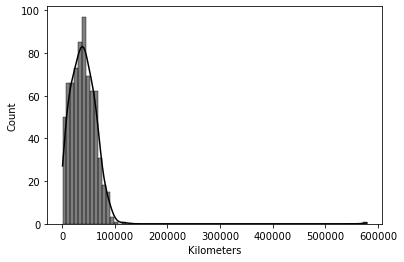

In [27]:
# Kilometers data histplot distribution 
sns.histplot(data['Kilometers'],kde=True,color='k')
print('Minimum',data['Kilometers'].min())
print('Maximum',data['Kilometers'].max())

kilometers range almost between 95,472 to 105763 km which seems flat not huge varitaion 

In [28]:
#encoding object into numerical data
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder()

In [29]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=ord.fit_transform(data[i].values.reshape(-1,1))

In [30]:
data.head()

,Brand,Price,History,Owner,Kilometers,Fuel_Type,Last_service,Transmission,Registration,Insurance
0,417.0,566399,0.0,0.0,1755,1.0,1.0,9.0,62.0,35.0
1,199.0,267799,0.0,0.0,10957,1.0,1.0,27.0,25.0,135.0
2,417.0,559499,0.0,0.0,3570,1.0,1.0,27.0,7.0,118.0
3,414.0,398999,0.0,0.0,3176,1.0,1.0,27.0,25.0,122.0
4,421.0,641499,0.0,0.0,6460,1.0,1.0,0.0,31.0,135.0


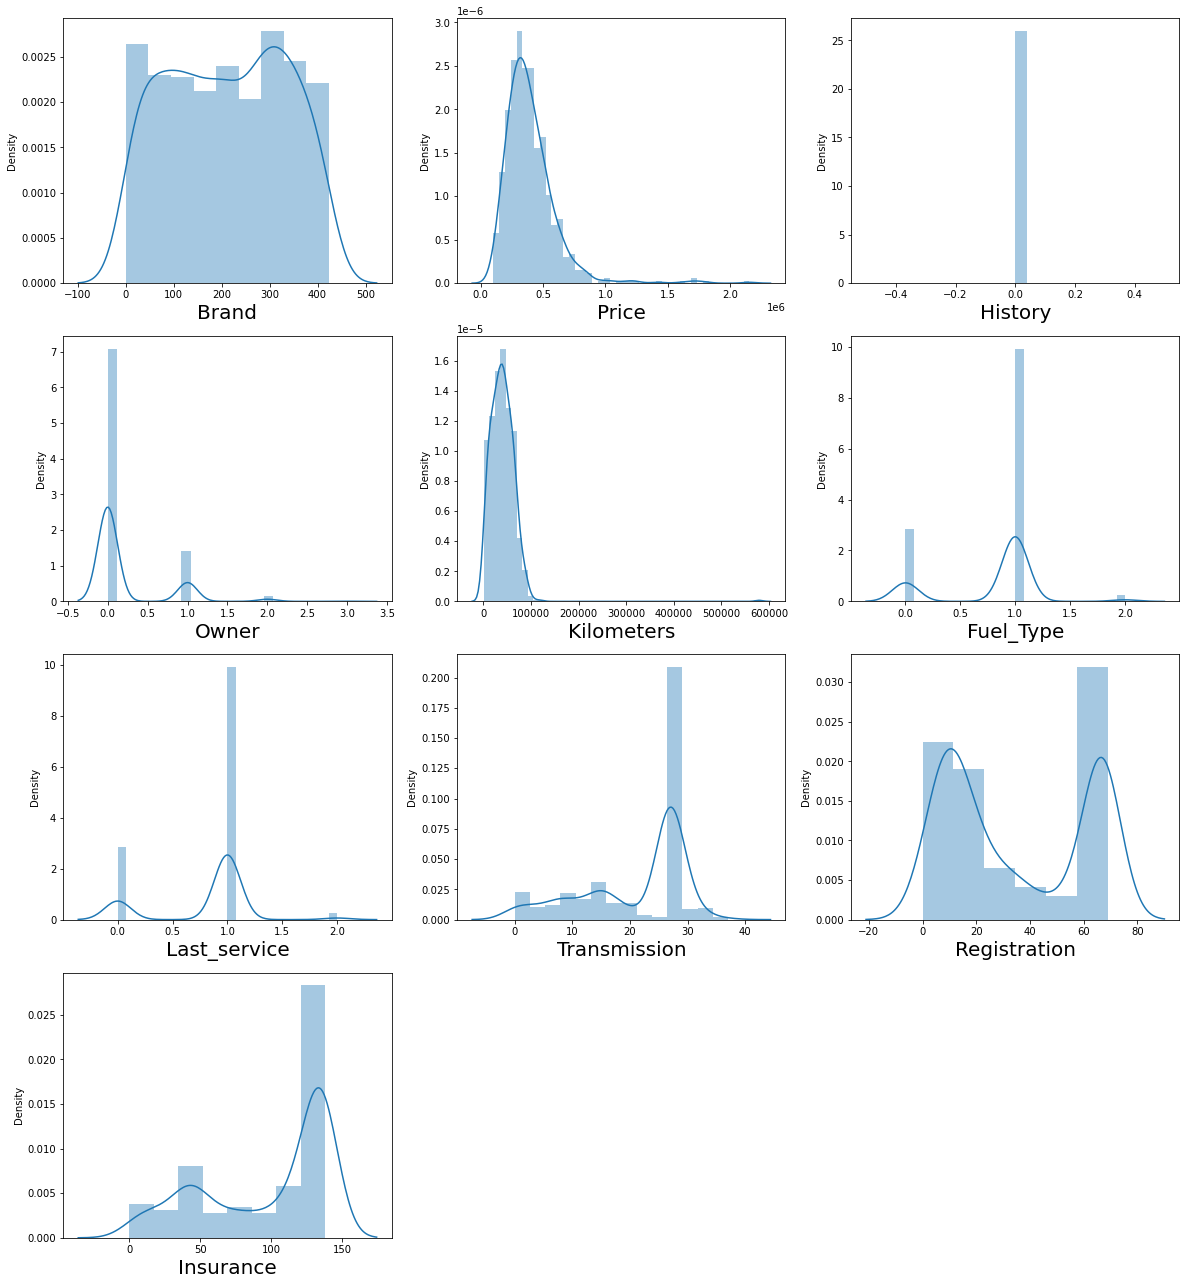

In [31]:
#Visualization of data distribution 

plt.figure(figsize=(20,40))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

Price is target variable and it is right skewed ,kilometers is also right skkwed data ,rest are categorical data

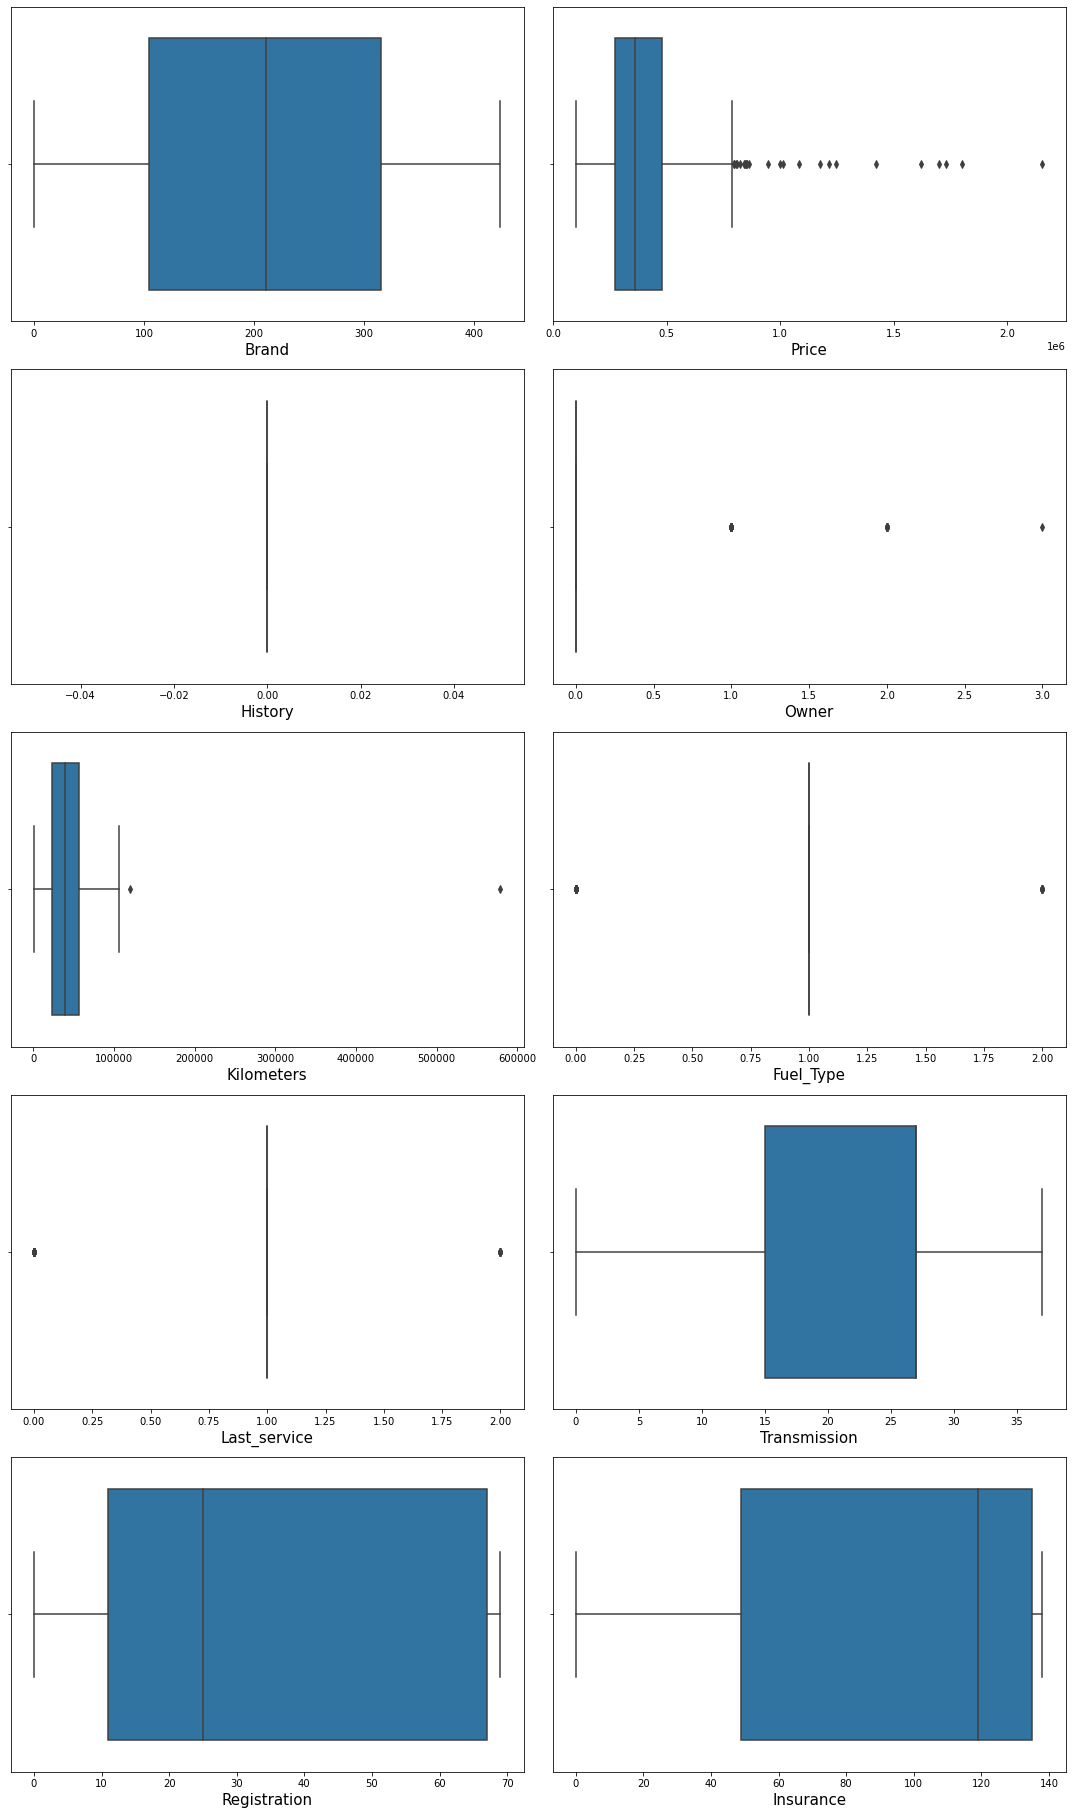

In [32]:
#Visualize the outliers using boxplot first dataset insur1
plt.figure(figsize=(15,50))
graph=1
for column in data:
    if graph<=20:
        ax=plt.subplot(10,2,graph)
        ax=sns.boxplot(data[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout() 

Kilometers have few outliers while Price shows significant outliers in dataset

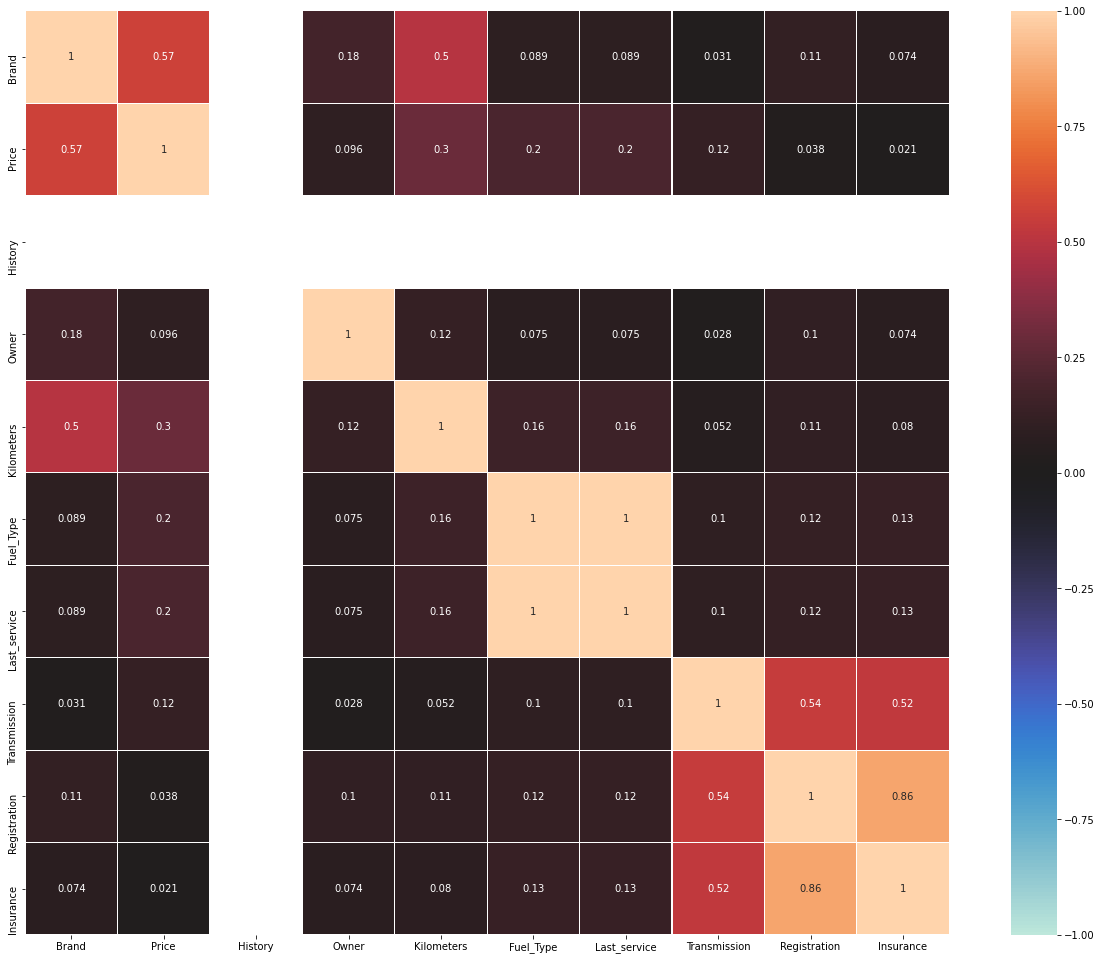

In [33]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity
df_corr=data.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

<AxesSubplot:title={'center':'correlation with target'}>

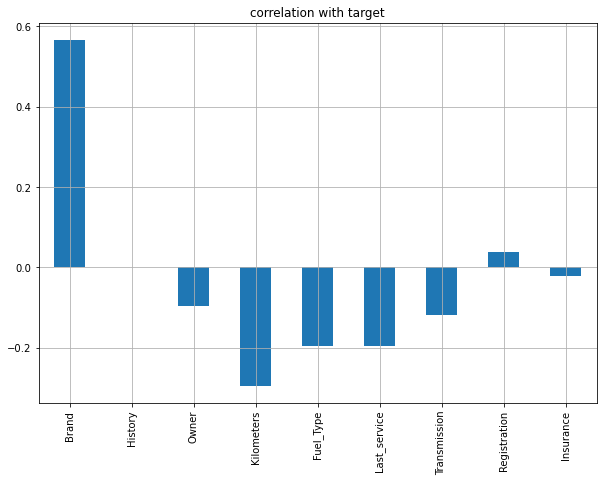

In [34]:
#take same data and visualize the correlation with class 
data.drop('Price',axis=1).corrwith(data.Price).plot(kind='bar',grid=True,figsize=(10,7),
                                                 title='correlation with target')

Brand have strong positive relation ,Registration show weak postive relation other features shows negative realtionship with target variable ,but history have no relation with target variable

# Features Selection 

In [35]:
#seprate featurs and label
Y=data.Price
X=data.drop(columns='Price',axis=1)

In [36]:
#Scale the feature data and train test split
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X_scaler,Y,test_size=0.25,random_state=12)

# Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred=Lr.predict(x_test)

In [40]:
#linear model training score
Lr.score(x_train,y_train)

0.4054881136101919

In [41]:
#mean absolute erro
mean_absolute_error(y_pred,y_test)

101437.98825391031

# Hyperparameter Tuning  of Linear Reg

In [42]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [43]:
lassocv=LassoCV(alphas=None, max_iter=100,normalize=True)
lassocv.fit(x_train,y_train) 

LassoCV(max_iter=100, normalize=True)

In [44]:
alpha=lassocv.alpha_
alpha

80.44499770593927

In [45]:
#now with Lasso regression lets see how our data is fitted 
lasso_reg=Lasso(alpha=alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=80.44499770593927)

In [46]:
lasso_reg.score(x_train,y_train)

0.4054852740509187

In [47]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [48]:
ridgecv.alpha_

0.030999999999999996

In [49]:
ridge_l1=Ridge(alpha=ridgecv.alpha_)
ridge_l1.fit(x_train,y_train)

Ridge(alpha=0.030999999999999996)

In [50]:
ridge_l1.score(x_test,y_test)

0.3897922031934573

Cross validation of model

In [51]:
cross_val_score(ridge_l1,X_scaler,Y,cv=5).mean()

0.29883380238852225

In [52]:
cross_val_score(lasso_reg,X_scaler,Y,cv=5).mean()

0.2993518593605284

Model score is low and cross validation score is low model is overfit,we will try to build more model to find good accuracy

In [53]:
#model building with Decesion tree 
from sklearn.tree import DecisionTreeRegressor

In [54]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [55]:
dt.score(x_train,y_train)

1.0

In [56]:
cross_val_score(dt,X_scaler,Y,cv=5).mean()

-1.187554995629677

oh cross val score shows model is overfitted we need to tune it

# Hyperparamter tuning ofDecesion Tree model

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
parametrs={'criterion':['mse'],
    'max_depth':range(1,20,2),
    'min_samples_split':range(2,16, 2),
    'min_samples_leaf':range(1,10,1),
    'min_weight_fraction_leaf':[0.01,0.02,0.1,1]}

In [59]:
grid_search=GridSearchCV(estimator=dt,param_grid=parametrs,cv=5)

In [60]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': range(1, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 16, 2),
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.1, 1]})

In [61]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.02}

In [62]:
dt=DecisionTreeRegressor(criterion='mse',
                         max_depth=3,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.02)

In [63]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, min_weight_fraction_leaf=0.02)

In [64]:
dt.score(x_train,y_train)

0.48335499391881853

In [65]:
y_pred=dt.predict(x_test)

In [66]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))   

**** accuracy post tuning****
0.3564318583966032


In [67]:
cross_val_score(dt,X_scaler,Y,cv=7).mean()

0.24660579510934985

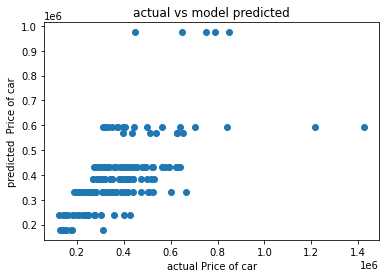

In [68]:
#Visualization of actual vs predicted price
plt.scatter(y_test,y_pred)
plt.xlabel('actual Price of car')
plt.ylabel('predicted  Price of car')
plt.title('actual vs model predicted')
plt.show()

# GradientBoost Regression model

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [70]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [71]:
#check model score
gbr.score(x_train,y_train)

0.8701568709023249

In [72]:
y_pred=gbr.predict(x_test)

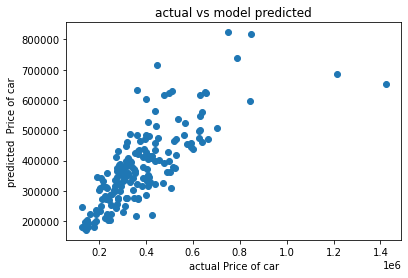

In [73]:
#Visualization of actual vs predicted price
plt.scatter(y_test,y_pred)
plt.xlabel('actual Price of car')
plt.ylabel('predicted  Price of car')
plt.title('actual vs model predicted')
plt.show()

In [74]:
cross_val_score(gbr,X_scaler,Y,cv=5).mean()

0.3168074617254162

model is overfitted but as per sactter plot seems good lets tune the model

In [75]:
#mean absolute error
mean_absolute_error(y_pred,y_test)

79082.49849120034

HyperParameter tuning of GradientBoosting reg model

In [76]:
param={'loss':['ls'],
    'learning_rate':[0.1,0.2,0.3,0.4],
    'n_estimators':[100,150,200,250],
    'subsample':[1.0,2,3,4,7],
    'criterion':['friedman_mse']}

In [77]:
grid_search=GridSearchCV(estimator=gbr,param_grid=param,cv=5)

In [78]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4], 'loss': ['ls'],
                         'n_estimators': [100, 150, 200, 250],
                         'subsample': [1.0, 2, 3, 4, 7]})

In [79]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'ls',
 'n_estimators': 200,
 'subsample': 1.0}

In [80]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.2, loss='ls',n_estimators=200,subsample=1)

In [81]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=200, subsample=1)

In [82]:
gbr.score(x_train,y_train)

0.9815908776391457

score improved after tuning the model

In [83]:
y_pred=gbr.predict(x_train)

In [84]:
cross_val_score(gbr,X_scaler,Y,cv=5).mean()

0.28645446841003375

# RandomForest Regression model

In [85]:
#RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [86]:
y_pred=rfr.predict(x_test)

In [87]:
rfr.score(x_train,y_train)

0.9277255066374975

In [88]:
cross_val_score(rfr,X_scaler,Y,cv=5).mean()

0.2153502005686228

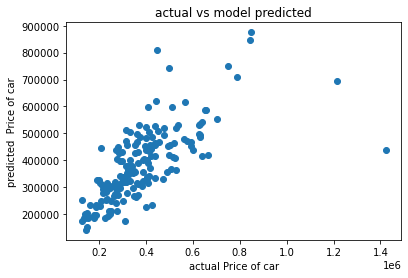

In [89]:
#Visualization of actual vs predicted price
plt.scatter(y_test,y_pred)
plt.xlabel('actual Price of car')
plt.ylabel('predicted  Price of car')
plt.title('actual vs model predicted')
plt.show()

as per cross validation and scatter plot model have overfitting issue ,lets tune the model

# Hyperparameter Tuning of RandomForestRegression model

In [90]:
param_grid = {  'bootstrap': [True],
              'max_depth': [5, 10, 15], 
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [91]:
grid=GridSearchCV(estimator=rfr,param_grid=param_grid,cv=5,n_jobs=-1)

In [92]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [93]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 13}

In [94]:
regr=RandomForestRegressor(bootstrap=True,max_depth=15,max_features='log2',n_estimators=12)

In [95]:
regr.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features='log2', n_estimators=12)

In [96]:
regr.score(x_train,y_train)

0.8963716458226655

In [97]:
y_pred=regr.predict(x_test)

In [98]:
cross_val_score(regr,X_scaler,Y,cv=5).mean()

0.18021707970582684

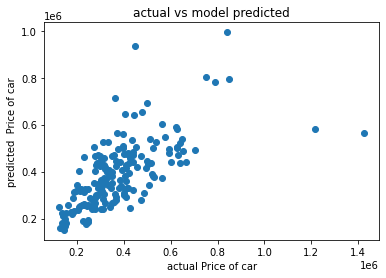

In [99]:
#Visualization of actual vs predicted price post tuning 
plt.scatter(y_test,y_pred)
plt.xlabel('actual Price of car')
plt.ylabel('predicted  Price of car')
plt.title('actual vs model predicted')
plt.show()

In [100]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))   

**** accuracy post tuning****
0.415008062188452


model score is good but r2 score and cross validation score reflect overfitting issue so far random forest and Gradientboost working quite ok with this dataset

# XGB Model

In [112]:
import xgboost as xgb
xgb=xgb.XGBRegressor()

In [113]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
y_pred=xgb.predict(x_test)
print(r2_score(y_test,y_pred))

0.5009968253325215


In [104]:
#model score
xgb.score(x_train,y_train)

0.9992926935852475

In [105]:
cross_val_score(xgb,X_scaler,Y,cv=5).mean()

0.23649438640948706

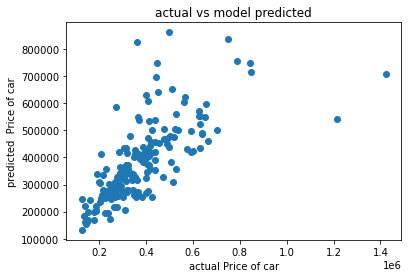

In [106]:
#Visualization of actual vs predicted price 
plt.scatter(y_test,y_pred)
plt.xlabel('actual Price of car')
plt.ylabel('predicted  Price of car')
plt.title('actual vs model predicted')
plt.show()

# Hyperparameter Tuning 

In [107]:
grid_param={ 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'gamma':range(0,5,1),
'learning_rate':[0.01,0.02,.2,.3,.1]
}

In [108]:
grid_search=GridSearchCV(xgb,param_grid=grid_param,cv=5)

In [109]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [110]:
grid_search.best_params_

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1}

In [117]:
grid_search.best_score_

0.4768655086668249

cross validation post tuning

In [118]:
cross_val_score(xgb,X_scaler,Y,cv=5).mean()

0.23649438640948706

In [114]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))   

**** accuracy post tuning****
0.5009968253325215


In [115]:
#saving model ,XGB r2 score is best among all model so we save XGB for future use
import pickle
filename='finalized_model.pickel'
pickle.dump(xgb, open(filename,'wb'))